In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from time import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, make_scorer

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
import joblib

In [2]:
df = pd.read_csv('../../cyberbullying/data/data.csv')
df.head()

,text,target
0,this one can make an analogy in mathematical t...,0
1,clarification for you and zundarks right i ...,0
2,elected or electoral jhk,0
3,this is such a fun entry devotchka i once h...,0
4,please relate the ozone hole to increases in c...,0


In [3]:
df.shape

(158883, 2)

In [4]:
df_lem = pd.read_csv('../../cyberbullying/data/data_lem.csv')
df_lem.head()

,text,target
0,one make analogy mathematical terms envisionin...,0
1,clarification zundarks right checked wikipedia...,0
2,elected electoral jhk,0
3,fun entry devotchka coworker korea couldnt tel...,0
4,please relate ozone hole increases cancer prov...,0


In [5]:
df_lem.shape

(157203, 2)

In [6]:
def plot_dist(df):
    plt.figure(figsize = (7,7))
    sorted_counts = df['target'].value_counts()
    plt.pie(sorted_counts, labels = ['not bullying', 'bullying'], startangle = 90, counterclock = False,
            wedgeprops = {'width' : 0.6}, autopct='%1.1f%%', pctdistance = 0.7,
            textprops = {'color': 'black', 'fontsize' : 15}, shadow = True,
            colors = sns.color_palette("Paired")[7:])
    plt.text(x = -0.35, y = 0, s = f'Total comments: {df.shape[0]}')
    plt.title('Distribution of Comments in the Dataset', fontsize = 16);

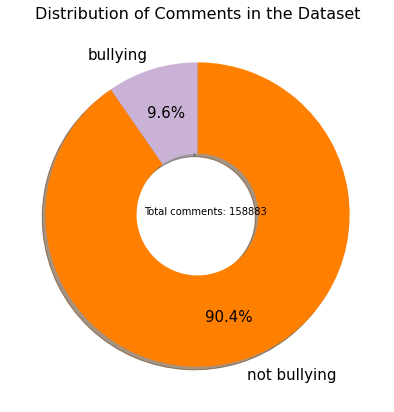

In [7]:
plot_dist(df)

In [8]:
percentage_used = 0.3
df_sample = df_lem.sample(frac=percentage_used, random_state=0)

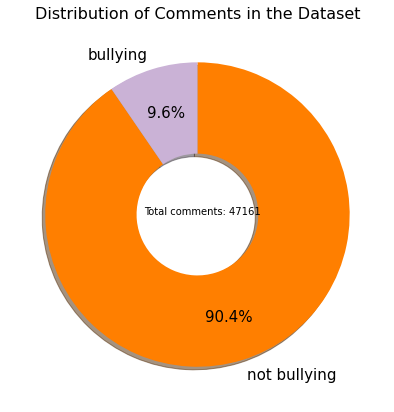

In [9]:
plot_dist(df_sample)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_sample['text'], df_sample['target'], test_size=0.3, random_state=0)

In [11]:
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
X_train_vec = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
X_test_vec = count_vector.transform(X_test)

In [12]:
training_data = X_train_vec
testing_data = X_test_vec

In [13]:
def pipeline(learner_list, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    # Get length of Training Data:
    size = len(y_train)
    
    results = {}
    final_results = []
    
    for learner in learner_list:
        
        # Store the learner name:
        results['Algorithm'] = learner.__class__.__name__

        # Fit the learner:
        start = time() # Get start time
        print("Training {}".format(learner.__class__.__name__))
        learner = learner.fit(X_train, y_train)
        end = time() # Get end time

        # Store the training time
        results['Training Time'] = end - start

        start = time() # Get start time
        predictions_test = learner.predict(X_test)
        predictions_train = learner.predict(X_train)
        end = time() # Get end time

        # Store the prediction time
        results['Prediction Time'] = end - start

        # Compute the Accuracy on Test Set
        results['Accuracy: Test'] = accuracy_score(y_test, predictions_test)

        # Compute the Accuracy on Training Set
        results['Accuracy: Train'] = accuracy_score(y_train, predictions_train)

        # Compute the F1 Score on Test Set
        results['F1 Score: Test'] = f1_score(y_test, predictions_test)

        # Compute the F1 Score on Training Set
        results['F1 Score: Train'] = f1_score(y_train, predictions_train)

        # Compute the Precision on Test Set
        results['Precision: Test'] = precision_score(y_test, predictions_test)

        # Compute the Precision on Training Set
        results['Precision: Train'] = precision_score(y_train, predictions_train)

        # Compute the Recall on Test Set
        results['Recall: Test'] = recall_score(y_test, predictions_test)

        # Compute the Recall on Training Set
        results['Recall: Train'] = recall_score(y_train, predictions_train)

        # Success
        print("Training {} finished in {:.2f} sec".format(learner.__class__.__name__, results['Training Time']))
        print('----------------------------------------------------')
        
        final_results.append(results.copy())
    # Return a dataframe of the results
    return final_results

In [14]:
# make a list of models
models = [MultinomialNB(),
          DecisionTreeClassifier(),
          LinearSVC(),
          AdaBoostClassifier(),
          RandomForestClassifier(),
          BaggingClassifier(),
          LogisticRegression(solver='liblinear'),
          SGDClassifier(),
          KNeighborsClassifier()
]

In [15]:
%%time
re = pipeline(models, X_train_vec, y_train, X_test_vec, y_test)
results = pd.DataFrame(re)
results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'Training Time'])

Training MultinomialNB
Training MultinomialNB finished in 0.01 sec
----------------------------------------------------
Training DecisionTreeClassifier
Training DecisionTreeClassifier finished in 13.49 sec
----------------------------------------------------
Training LinearSVC


/home/pjcopado/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Training LinearSVC finished in 0.72 sec
----------------------------------------------------
Training AdaBoostClassifier
Training AdaBoostClassifier finished in 2.20 sec
----------------------------------------------------
Training RandomForestClassifier
Training RandomForestClassifier finished in 38.81 sec
----------------------------------------------------
Training BaggingClassifier
Training BaggingClassifier finished in 96.16 sec
----------------------------------------------------
Training LogisticRegression
Training LogisticRegression finished in 2.90 sec
----------------------------------------------------
Training SGDClassifier
Training SGDClassifier finished in 0.13 sec
----------------------------------------------------
Training KNeighborsClassifier
Training KNeighborsClassifier finished in 0.00 sec
----------------------------------------------------
CPU times: user 3min 12s, sys: 35.9 s, total: 3min 48s
Wall time: 3min 14s


In [16]:
results = results.reindex(columns = ['Algorithm', 'Accuracy: Test', 'Precision: Test', 'Recall: Test', 'F1 Score: Test', 'Prediction Time',
                          'Accuracy: Train', 'Precision: Train', 'Recall: Train', 'F1 Score: Train', 'Training Time'])

results.sort_values(by = 'F1 Score: Test', inplace = True, ascending = False)

In [17]:
results.reset_index(drop = True)

,Algorithm,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time
0,SGDClassifier,0.949749,0.826590,0.617711,0.707046,0.004166,0.988822,0.992126,0.888746,0.937595,0.133759
1,LinearSVC,0.946498,0.765546,0.655868,0.706475,0.004302,0.999152,0.998709,0.992305,0.995497,0.721117
2,BaggingClassifier,0.944731,0.757859,0.642189,0.695246,0.642711,0.992336,0.990082,0.928182,0.958133,96.159988
3,RandomForestClassifier,0.950315,0.881960,0.570194,0.692610,4.211527,0.999879,1.000000,0.998718,0.999358,38.809098
4,LogisticRegression,0.948830,0.849632,0.581713,0.690598,0.005253,0.985611,0.991815,0.854761,0.918202,2.900531
5,DecisionTreeClassifier,0.937522,0.688856,0.663067,0.675715,0.070027,0.999970,1.000000,0.999679,0.999840,13.488327
6,MultinomialNB,0.942257,0.868557,0.485241,0.622633,0.009797,0.956107,0.832935,0.669766,0.742492,0.010524
7,AdaBoostClassifier,0.940066,0.875173,0.454284,0.598104,0.397985,0.943748,0.883820,0.465854,0.610120,2.199302
8,KNeighborsClassifier,0.921125,0.854545,0.236861,0.370913,34.846399,0.935357,0.928634,0.342097,0.500000,0.002271


In [18]:
results.describe().loc[['min', 'max'], :]

,Accuracy: Test,Precision: Test,Recall: Test,F1 Score: Test,Prediction Time,Accuracy: Train,Precision: Train,Recall: Train,F1 Score: Train,Training Time
min,0.921125,0.688856,0.236861,0.370913,0.004166,0.935357,0.832935,0.342097,0.50000,0.002271
max,0.950315,0.881960,0.663067,0.707046,34.846399,0.999970,1.000000,0.999679,0.99984,96.159988


In [19]:
# store the best metric scores
best_acc = results[results['Accuracy: Test'] == results['Accuracy: Test'].max()]
best_f1 = results[results['F1 Score: Test'] == results['F1 Score: Test'].max()]
best_precision = results[results['Precision: Test'] == results['Precision: Test'].max()]
best_recall = results[results['Recall: Test'] == results['Recall: Test'].max()]

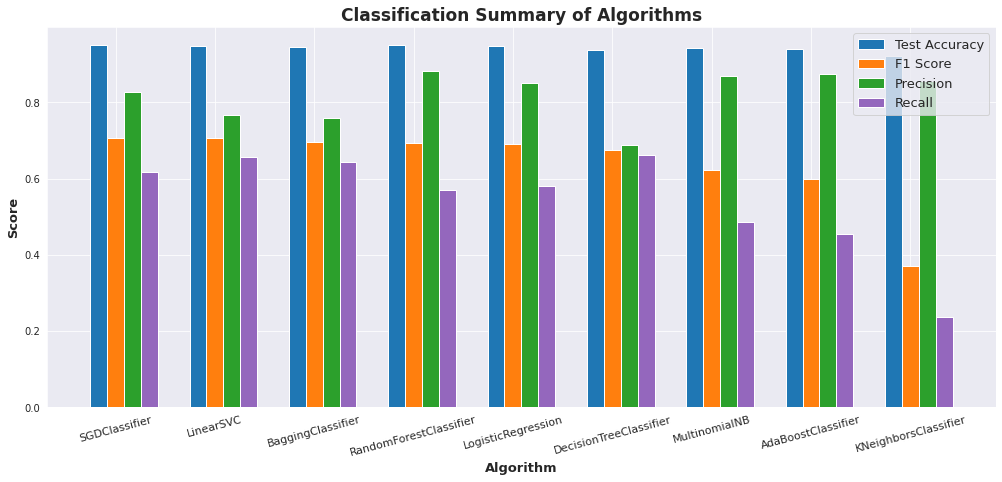

In [20]:
sns.set_style('darkgrid')
plt.figure(figsize = (17, 7))

barWidth = 0.17
 
# set height of bar
bars1 = results['Accuracy: Test']
bars2 = results['F1 Score: Test']
bars3 = results['Precision: Test']
bars4 = results['Recall: Test']

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

 
# Make the plot
pal = sns.color_palette()
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Test Accuracy')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='F1 Score')
plt.bar(r3, bars3, color= pal[2], width=barWidth, edgecolor='white', label='Precision')
plt.bar(r4, bars4, color= pal[4], width=barWidth, edgecolor='white', label='Recall')

 
# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Score', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)
 
# Create legend & Show graphic
plt.legend(fontsize = 13)

textstr = '\n'.join(['Best Accuracy: {:.3f} - {}'.format(best_acc['Accuracy: Test'].values[0], best_acc['Algorithm'].values[0]), 
                     'Best F1 Score: {:.3f} - {}'.format(best_f1['F1 Score: Test'].values[0], best_f1['Algorithm'].values[0]),
                   'Best Precision: {:.3f} - {}'.format(best_precision['Precision: Test'].values[0], best_precision['Algorithm'].values[0]), 
                    'Best Recall: {:.3f} - {}'.format(best_recall['Recall: Test'].values[0], best_recall['Algorithm'].values[0])])
props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

#place a text box
#plt.text(9.2, 1, textstr, fontsize=14,
#        verticalalignment='top', bbox=props)

plt.title('Classification Summary of Algorithms', fontweight = 'bold', fontsize = 17);

In [21]:
# store the best/worst performance time
best_train_time = results[results['Training Time'] == results['Training Time'].min()]
worst_train_time = results[results['Training Time'] == results['Training Time'].max()]
best_prediction_time = results[results['Prediction Time'] == results['Prediction Time'].min()]
worst_prediction_time = results[results['Prediction Time'] == results['Prediction Time'].max()]

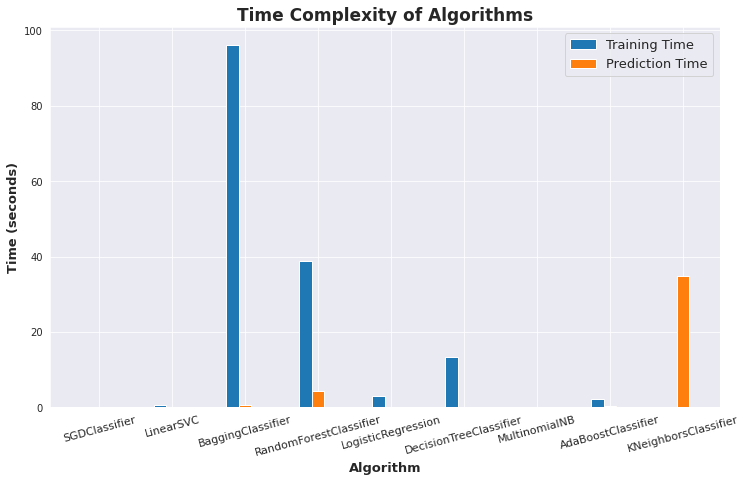

In [22]:
plt.figure(figsize = (12, 7))

barWidth = 0.17
 
# set height of bar
bars1 = results['Training Time']
bars2 = results['Prediction Time']
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color= pal[0], width=barWidth, edgecolor='white', label='Training Time')
plt.bar(r2, bars2, color= pal[1], width=barWidth, edgecolor='white', label='Prediction Time')
 
# Add xticks on the middle of the group bars
plt.xlabel('Algorithm', fontweight='bold', fontsize = 13)
plt.ylabel('Time (seconds)', fontweight = 'bold', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(bars1))], results['Algorithm'], rotation = 15, fontsize = 11)
 
# Create legend & Show graphic
plt.legend(fontsize = 13)

textstr = '\n'.join(('Best Training Time: {:.3f} - {}'.format(best_train_time['Training Time'].values[0], best_train_time['Algorithm'].values[0]), 
                     'Worst Training Time: {:.3f} - {}'.format(worst_train_time['Training Time'].values[0], worst_train_time['Algorithm'].values[0]),
                   'Best Prediction Time: {:.3f} - {}'.format(best_prediction_time['Training Time'].values[0], best_prediction_time['Algorithm'].values[0]), 
                    'Worst Prediction Time: {:.3f} - {}'.format(worst_prediction_time['Training Time'].values[0], worst_prediction_time['Algorithm'].values[0])))

props = dict(boxstyle='round', facecolor='lightgrey', alpha=0.5)

#place a text box
#plt.text(9, 36, textstr, fontsize=14,  bbox=props)

plt.title('Time Complexity of Algorithms', fontweight = 'bold', fontsize = 17);

## Tunning Hyperparameters

In [23]:
def param_tuning(clf, param_dict, X_train, y_train, X_test, y_test):
    
    # make scorer object
    scorer = make_scorer(f1_score)

    # perform Grid Search for Parameters
    grid_obj = GridSearchCV(estimator = clf,
                           param_grid = param_dict,
                           scoring = scorer,
                           cv = 5)

    grid_fit = grid_obj.fit(X_train, y_train)

    # Get the estimator
    best_clf = grid_fit.best_estimator_

    # Make predictions using the unoptimized and model
    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)
    
    # Report the before-and-afterscores
    print(clf.__class__.__name__)
    print("\nOptimized Model\n------")
    print(f"Best Parameters: {grid_fit.best_params_}")
    print(f"Accuracy: {accuracy_score(y_test, best_predictions):.4f}")
    print(f"F1-score: {f1_score(y_test, best_predictions):.4f}")
    print(f"Precision: {precision_score(y_test, best_predictions):.4f}")
    print(f"Recall: {recall_score(y_test, best_predictions):.4f}")
    
    return best_clf

In [24]:
%%time
# Stochastic Gradient Descent
param_grid = {
    'alpha' : [0.095, 0.0002, 0.0003],
    'max_iter' : [2500, 3000, 4000]
}

clf_sgd = SGDClassifier()

best_clf_sgd = param_tuning(clf_sgd, param_grid, training_data, y_train, testing_data, y_test)

SGDClassifier

Optimized Model
------
Best Parameters: {'alpha': 0.0002, 'max_iter': 2500}
Accuracy: 0.9500
F1-score: 0.6967
Precision: 0.8620
Recall: 0.5846
CPU times: user 14.7 s, sys: 41.5 s, total: 56.2 s
Wall time: 4.99 s


In [25]:
%%time
# Logistic Regression
param_grid = {
    'C': [1, 1.2, 1.3, 1.4]
}

clf_lr = LogisticRegression(solver='liblinear')

best_clf_lr = param_tuning(clf_lr, param_grid, training_data, y_train, testing_data, y_test)

/home/pjcopado/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LogisticRegression

Optimized Model
------
Best Parameters: {'C': 1.3}
Accuracy: 0.9490
F1-score: 0.6933
Precision: 0.8472
Recall: 0.5868
CPU times: user 3min 1s, sys: 9min 4s, total: 12min 6s
Wall time: 1min


In [26]:
%%time
# Decision Tree
param_grid = {
    'min_samples_split': [2, 5, 8],
    'min_samples_leaf': [1, 2, 5, 8]
}

clf_dt = DecisionTreeClassifier()

best_clf_dt = param_tuning(clf_dt, param_grid, training_data, y_train, testing_data, y_test)

DecisionTreeClassifier

Optimized Model
------
Best Parameters: {'min_samples_leaf': 2, 'min_samples_split': 8}
Accuracy: 0.9414
F1-score: 0.6798
Precision: 0.7333
Recall: 0.6335
CPU times: user 8min 32s, sys: 607 ms, total: 8min 32s
Wall time: 8min 32s


In [29]:
%%time
# Random Forest Classifier
param_grid = {
    'n_estimators': [50,150],
    'min_samples_leaf': [1, 5],
    'min_samples_split': [2, 5]
}

clf_rf = RandomForestClassifier()

best_clf_rf = param_tuning(clf_rf, param_grid, training_data, y_train, testing_data, y_test)

RandomForestClassifier

Optimized Model
------
Best Parameters: {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.9488
F1-score: 0.6796
Precision: 0.8799
Recall: 0.5536
CPU times: user 42min 43s, sys: 0 ns, total: 42min 43s
Wall time: 42min 43s


In [49]:
%%time
# Linear SVC
param_grid = {
    'C': [0.25, 0.5, 0.75, 1, 1.2]
}

clf_linsvc = LinearSVC(max_iter=10000, dual=True)

best_clf_linsvc = param_tuning(clf_linsvc, param_grid, training_data, y_train, testing_data, y_test)

/home/pjcopado/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC

Optimized Model
------
Best Parameters: {'C': 0.25}
Accuracy: 0.9490
F1-score: 0.7080
Precision: 0.8093
Recall: 0.6292
CPU times: user 2min 6s, sys: 0 ns, total: 2min 6s
Wall time: 2min 6s


In [50]:
X_train_vec

<33012x80684 sparse matrix of type '<class 'numpy.int64'>'
	with 906168 stored elements in Compressed Sparse Row format>

In [48]:
results_tunned = {'Model':[], 'Best Parameters':[], 'Accuracy':[], 'F1-score':[], 'Precision':[], 'Recall':[]}

for model in [best_clf_sgd, best_clf_lr, best_clf_dt, best_clf_rf, best_clf_linsvc]:
    best_predictions = model.predict(X_test_vec)
    results_tunned['Model'].append(model.__class__.__name__)
    results_tunned["Best Parameters"].append(model.get_params())
    results_tunned["Accuracy"].append(accuracy_score(y_test, best_predictions))
    results_tunned["F1-score"].append(f1_score(y_test, best_predictions))
    results_tunned["Precision"].append(precision_score(y_test, best_predictions))
    results_tunned["Recall"].append(recall_score(y_test, best_predictions))

#results_tunned
pd.DataFrame(results_tunned)

,Model,Best Parameters,Accuracy,F1-score,Precision,Recall
0,SGDClassifier,"{'alpha': 0.0002, 'average': False, 'class_wei...",0.950032,0.696697,0.861996,0.584593
1,LogisticRegression,"{'C': 1.3, 'class_weight': None, 'dual': False...",0.949042,0.693322,0.847193,0.586753
2,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.941409,0.679799,0.733333,0.633549
3,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.948760,0.679629,0.879863,0.553636
4,LinearSVC,"{'C': 0.25, 'class_weight': None, 'dual': True...",0.949042,0.707979,0.809259,0.629230
